In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mpoli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mpoli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
tf_data = pd.read_csv("/Users/mpoli/Desktop/MASTER/DIPLOMATIKI/course_venv/API/API_csvs/tmdb_data.csv")


In [3]:
tf_data.columns

Index(['Unnamed: 0', 'budget', 'homepage', 'id', 'imdb_id', 'revenue',
       'runtime', 'language', 'description', 'popularity', 'title', 'rating',
       'votes', 'year', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5',
       'genre6', 'genre7', 'genre8'],
      dtype='object')

##### first we will merge the columns with the genres in order to apply the new column in the tf-idf method

In [4]:
tf_data.fillna('empty', inplace=True)
tf_data["genres"] = (
    tf_data[['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']]
        .apply(lambda x: x.str.split(',\s*'))
        .sum(axis=1).map(np.array)
        .apply(lambda x: ', '.join(np.unique(x[x != 'empty'])))        
        .replace('', 'empty')
    )
tf_data.genres

0                  Action, Adventure, ScienceFiction
1                    Action, Comedy, Crime, Thriller
2                         Adventure, Family, Fantasy
3         Action, Adventure, Fantasy, ScienceFiction
4                         Action, Adventure, Fantasy
                            ...                     
9867                          Drama, Family, Romance
9868                         Crime, Horror, Thriller
9869        Drama, Mystery, ScienceFiction, Thriller
9870                  Comedy, Horror, ScienceFiction
9871    Adventure, Animation, Crime, Family, Mystery
Name: genres, Length: 9872, dtype: object

##### To follow the method of the article we first delete the movies that have the genres: Animation, Documentary, Histoty, Family, Music and TV Movie

In [5]:
tf_data.drop(tf_data[(tf_data['genre1'] == 'Animation') | (tf_data['genre2'] == 'Animation')|
                               (tf_data['genre3'] == 'Animation') | (tf_data['genre3'] == 'Animation')|
                               (tf_data['genre5'] == 'Animation') | (tf_data['genre4'] == 'Animation')|
                               (tf_data['genre7'] == 'Animation') | (tf_data['genre8'] == 'Animation')].index, inplace = True)
  

In [6]:
tf_data.drop(tf_data[(tf_data['genre1'] == 'Documentary') | (tf_data['genre2'] == 'Documentary')|
                               (tf_data['genre3'] == 'Documentary') | (tf_data['genre3'] == 'Documentary')|
                               (tf_data['genre5'] == 'Documentary') | (tf_data['genre4'] == 'Documentary')|
                               (tf_data['genre7'] == 'Documentary') | (tf_data['genre8'] == 'Documentary')].index, inplace = True)

In [7]:
tf_data.drop(tf_data[(tf_data['genre1'] == 'Family') | (tf_data['genre2'] == 'Family')|
                               (tf_data['genre3'] == 'Family') | (tf_data['genre3'] == 'Family')|
                               (tf_data['genre5'] == 'Family') | (tf_data['genre4'] == 'Family')|
                               (tf_data['genre7'] == 'Family') | (tf_data['genre8'] == 'Family')].index, inplace = True)

In [8]:
tf_data.drop(tf_data[(tf_data['genre1'] == 'History') | (tf_data['genre2'] == 'History')|
                               (tf_data['genre3'] == 'History') | (tf_data['genre3'] == 'History')|
                               (tf_data['genre5'] == 'History') | (tf_data['genre4'] == 'History')|
                               (tf_data['genre7'] == 'History') | (tf_data['genre8'] == 'History')].index, inplace = True)

In [9]:
tf_data.drop(tf_data[(tf_data['genre1'] == 'Music') | (tf_data['genre2'] == 'Music')|
                               (tf_data['genre3'] == 'Music') | (tf_data['genre3'] == 'Music')|
                               (tf_data['genre5'] == 'Music') | (tf_data['genre4'] == 'Music')|
                               (tf_data['genre7'] == 'Music') | (tf_data['genre8'] == 'Music')].index, inplace = True)

In [10]:
tf_data.drop(tf_data[(tf_data['genre1'] == 'TVMovie') | (tf_data['genre2'] == 'TVMovie')|
                               (tf_data['genre3'] == 'TVMovie') | (tf_data['genre3'] == 'TVMovie')|
                               (tf_data['genre5'] == 'TVMovie') | (tf_data['genre4'] == 'TVMovie')|
                               (tf_data['genre7'] == 'TVMovie') | (tf_data['genre8'] == 'TVMovie')].index, inplace = True)

In [11]:
len(tf_data)

7083

##### Στη συνέχεια για να εφαρμόσουμε την μέθοδο TF-IDF θα προχωρήσουμε στην επεξερασία της μεταβλητής description

In [12]:
tf_data['description'] = tf_data['description'].astype("string")
tf_data.dtypes

Unnamed: 0       int64
budget           int64
homepage        object
id               int64
imdb_id         object
revenue          int64
runtime          int64
language        object
description     string
popularity     float64
title           object
rating         float64
votes            int64
year             int64
genre1          object
genre2          object
genre3          object
genre4          object
genre5          object
genre6          object
genre7          object
genre8          object
genres          object
dtype: object

#### Preproccesing the data

##### lowercase

In [13]:
tf_data.description

0       Set more than a decade after the events of the...
1       When a team of mercenaries breaks into a wealt...
3       In the 22nd century, a paraplegic Marine is di...
4       Deep inside the mountain of Dovre, something g...
5       Nearly 5,000 years after he was bestowed with ...
                              ...                        
9863    Georges and Anne are in their eighties. They a...
9866    Two brothers, on either side of the law, face ...
9868    After a serial killer strangles several women ...
9869    At the dawn of the space-race, two radio-obses...
9870    In the town of Dillford, humans, vampires and ...
Name: description, Length: 7083, dtype: string

In [14]:
tf_data['description'] = tf_data['description'].str.lower()
tf_data.description

0       set more than a decade after the events of the...
1       when a team of mercenaries breaks into a wealt...
3       in the 22nd century, a paraplegic marine is di...
4       deep inside the mountain of dovre, something g...
5       nearly 5,000 years after he was bestowed with ...
                              ...                        
9863    georges and anne are in their eighties. they a...
9866    two brothers, on either side of the law, face ...
9868    after a serial killer strangles several women ...
9869    at the dawn of the space-race, two radio-obses...
9870    in the town of dillford, humans, vampires and ...
Name: description, Length: 7083, dtype: string

##### stopwords

In [15]:
#for the libraries
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [16]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
stop_words = set(stopwords.words('english'))

In [18]:
#https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tf_data.description

0       set decade events first film, learn story sull...
1       team mercenaries breaks wealthy family compoun...
3       22nd century, paraplegic marine dispatched moo...
4       deep inside mountain dovre, something gigantic...
5       nearly 5,000 years bestowed almighty powers eg...
                              ...                        
9863    georges anne eighties. cultivated, retired mus...
9866    two brothers, either side law, face organized ...
9868    serial killer strangles several women necktie,...
9869    dawn space-race, two radio-obsessed teens disc...
9870    town dillford, humans, vampires zombies living...
Name: description, Length: 7083, dtype: object

##### punctuation

In [19]:
#το κομμα να το βγάλω?

In [20]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n—”“–"
for i in symbols:
    tf_data.description = tf_data.description.str.replace(i," ")
tf_data.description

C:\Users\mpoli\AppData\Local\Temp\ipykernel_17888\420607143.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf_data.description = tf_data.description.str.replace(i," ")


0       set decade events first film, learn story sull...
1       team mercenaries breaks wealthy family compoun...
3       22nd century, paraplegic marine dispatched moo...
4       deep inside mountain dovre, something gigantic...
5       nearly 5,000 years bestowed almighty powers eg...
                              ...                        
9863    georges anne eighties  cultivated, retired mus...
9866    two brothers, either side law, face organized ...
9868    serial killer strangles several women necktie,...
9869    dawn space race, two radio obsessed teens disc...
9870    town dillford, humans, vampires zombies living...
Name: description, Length: 7083, dtype: object

In [21]:
tf_data.to_csv('tf_data.csv')

##### apostrophe

In [22]:
tf_data.description = tf_data.description.str.replace("’"," ")
tf_data.description = tf_data.description.str.replace("‘"," ")
tf_data.description = tf_data.description.str.replace("'"," ")
tf_data.description = tf_data.description.str.replace(",","")
tf_data.description

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
5       nearly 5000 years bestowed almighty powers egy...
                              ...                        
9863    georges anne eighties  cultivated retired musi...
9866    two brothers either side law face organized cr...
9868    serial killer strangles several women necktie ...
9869    dawn space race two radio obsessed teens disco...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7083, dtype: object

##### stopwords again 

In [23]:
stop_words = set(stopwords.words('english'))
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tf_data.description

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
5       nearly 5000 years bestowed almighty powers egy...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9868    serial killer strangles several women necktie ...
9869    dawn space race two radio obsessed teens disco...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7083, dtype: object

##### single characters

In [24]:
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >1]))
tf_data.description

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
5       nearly 5000 years bestowed almighty powers egy...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9868    serial killer strangles several women necktie ...
9869    dawn space race two radio obsessed teens disco...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7083, dtype: object

##### convert numbers

In [25]:
import num2words

In [26]:
#https://stackoverflow.com/questions/56733012/converting-number-in-sentences-to-word-in-python 
#is the for exaple 11th etc a problem?
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([num2words.num2words(i) if i.isdigit() else i for i in x.split()]))
tf_data['description'] 

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
5       nearly five thousand years bestowed almighty p...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9868    serial killer strangles several women necktie ...
9869    dawn space race two radio obsessed teens disco...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7083, dtype: object

##### punctuation and stopwords again

In [27]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n—”“–"
for i in symbols:
    tf_data.description = tf_data.description.str.replace(i," ")
tf_data.description

C:\Users\mpoli\AppData\Local\Temp\ipykernel_17888\420607143.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf_data.description = tf_data.description.str.replace(i," ")


0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
5       nearly five thousand years bestowed almighty p...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9868    serial killer strangles several women necktie ...
9869    dawn space race two radio obsessed teens disco...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7083, dtype: object

In [28]:
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

##### stemming

In [29]:
from nltk.stem import PorterStemmer

In [30]:
##with Porter Stemmer
#https://stackoverflow.com/questions/37443138/python-stemming-with-pandas-dataframe
#https://www.projectpro.io/recipes/use-porter-stemmer
ps = PorterStemmer()
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([ps.stem(y) for y in x.split()]))
tf_data.description

0       set decad event first film learn stori sulli f...
1       team mercenari break wealthi famili compound c...
3       22nd centuri parapleg marin dispatch moon pand...
4       deep insid mountain dovr someth gigant awaken ...
5       nearli five thousand year bestow almighti powe...
                              ...                        
9863    georg ann eighti cultiv retir music teacher da...
9866    two brother either side law face organ crime b...
9868    serial killer strangl sever women neckti londo...
9869    dawn space race two radio obsess teen discov s...
9870    town dillford human vampir zombi live peac ali...
Name: description, Length: 7083, dtype: object

#### Apply TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [32]:
#?TfidfVectorizer
#?train_test_split

##### apply the algorithm of tf-idf

In [34]:
#https://medium.com/@kunalgupta4595/predicting-movie-genres-based-on-plot-summaries-bae646e70e04
X= tf_data['description']
y=tf_data['genres']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size = 0.3,
                                   random_state = 42)

tfidf = TfidfVectorizer() #ngram_range=(2,3)
X_train_tfidf = tfidf.fit_transform(X_train) 
X_test_tfidf = tfidf.transform(X_test)
labels = tf_data.genres
X_train_tfidf.shape

(4958, 13711)

In [ ]:
#each of 4958 descriptions is represented by 13711 features, 
#representing the tf-idf score for different unigrams and bigrams.

In [38]:
#https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
#edo isos na kano auto me genres se numbers alla ola mazi se ena? ksexorista kai meta ola mazi?

#from sklearn.feature_selection import chi2
#import numpy as np
#N = 2
#for description, genres in sorted(tf_data.genres.items()):
#  features_chi2 = chi2(X_train_tfidf, labels == genres)
# indices = np.argsort(features_chi2[0])
# feature_names = np.array(tfidf.get_feature_names())[indices]
# bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
# trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
# print("# '{}':".format(description))
# print("  . Most correlated unigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
# print("  . Most correlated bigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

##### apply MLP

In [35]:
from sklearn.neural_network import MLPClassifier


 Confusion matrix



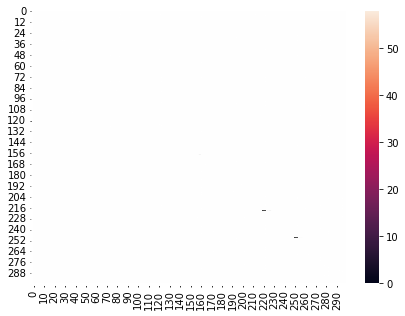

NameError: name 'metrics' is not defined

In [37]:
#https://slogix.in/source-code/python/deep-learning-samples/how-to-build-spam-detector-using-multi-layer-perceptron-in-python/
clf = MLPClassifier(activation='relu',
                    solver='adam',
                    max_iter=200,
                    hidden_layer_sizes=100,
                    random_state=42,
                    learning_rate='constant',
                    learning_rate_init=0.001)
#fit the model
clf.fit(X_train_tfidf, y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test_tfidf)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns
print("\n","Confusion matrix\n")
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [38]:
from sklearn import metrics
print("Classification report\n",metrics.classification_report(y_test, y_pred))
print("Accuracy of the model : ",metrics.accuracy_score(y_test, y_pred)*100)

Classification report
                                                                         precision    recall  f1-score   support

                                                                Action       0.10      0.07      0.08        28
                                                     Action, Adventure       0.00      0.00      0.00         8
                                             Action, Adventure, Comedy       0.00      0.00      0.00         8
                            Action, Adventure, Comedy, Crime, Thriller       1.00      0.25      0.40         4
                                 Action, Adventure, Comedy, Crime, War       0.00      0.00      0.00         1
                                      Action, Adventure, Comedy, Drama       0.00      0.00      0.00         3
                             Action, Adventure, Comedy, Drama, Romance       0.00      0.00      0.00         1
                                    Action, Adventure, Comedy, Fantasy       0.0

c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 